In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

## About Dataset
Home Value Insights: A Regression Dataset
designed to practice regression problems, particularly in the context of predicting house prices. It contains 1000 rows, with each row representing a house and various attributes that influence its price. The dataset is well-suited for learning basic to intermediate-level regression modeling techniques.

## Features:
- Square_Footage: The size of the house in square feet. Larger homes typically have higher prices.
- Num_Bedrooms: The number of bedrooms in the house. More bedrooms generally increase the value of a home.
- Num_Bathrooms: The number of bathrooms in the house. Houses with more bathrooms are typically priced higher.
- Year_Built: The year the house was built. Older houses may be priced lower due to wear and tear.
- Lot_Size: The size of the lot the house is built on, measured in acres. Larger lots tend to add value to a property.
- Garage_Size: The number of cars that can fit in the garage. Houses with larger garages are usually more expensive.
- Neighborhood_Quality: A rating of the neighborhood’s quality on a scale of 1-10, where 10 indicates a high-quality neighborhood. Better neighborhoods usually command higher prices.
- House_Price (Target Variable): The price of the house, which is the dependent variable you aim to predict.

In [3]:
df=pd.read_csv('house_price_regression_dataset.csv')
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


## CLEANING THE DATASET

In [5]:
#check for missing values
df.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

In [6]:
df.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality', 'House_Price'],
      dtype='object')

In [7]:
#check the minimum and maximum
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


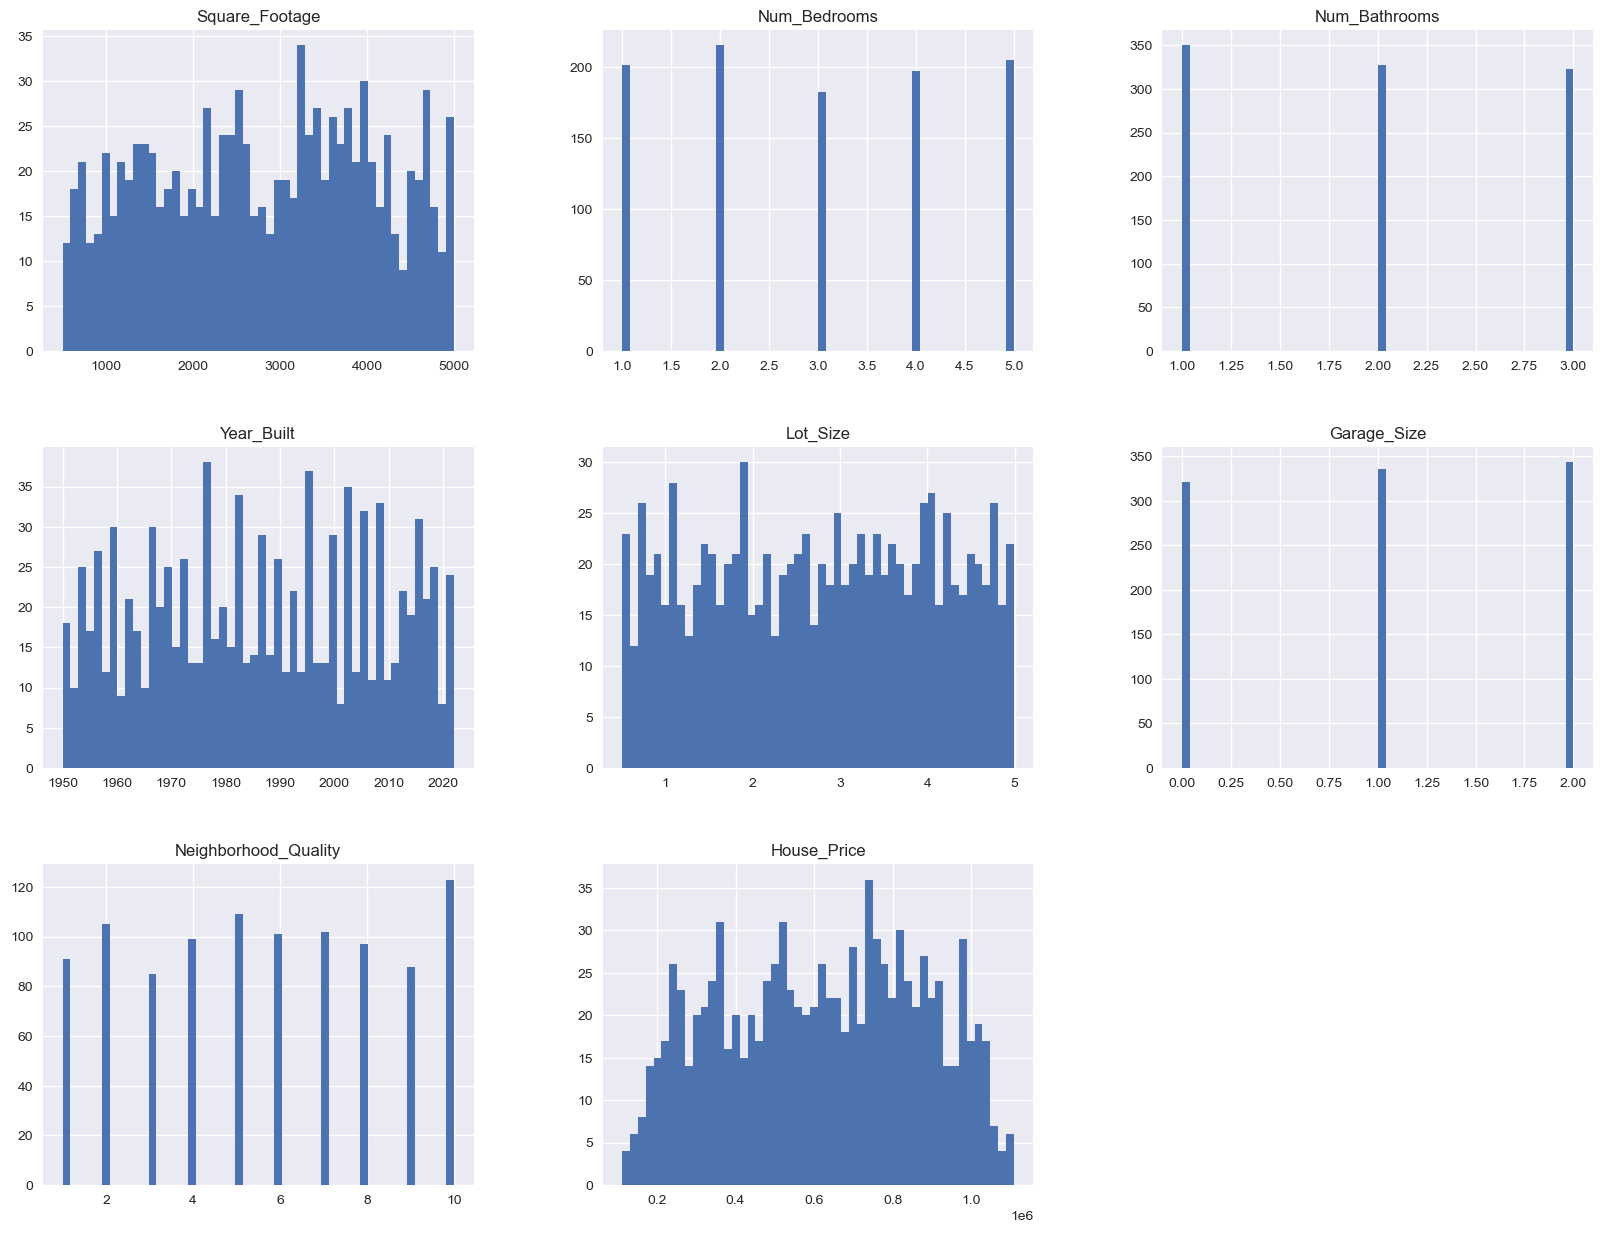

In [8]:
#check the histogram of all plot
plt.style.use('seaborn-v0_8')
df.hist(bins = 50, figsize=(20,15))
plt.show()

In [18]:
df.corr()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,-0.049024,0.014633
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,0.017585,-0.001862
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,-0.009549,0.051967
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.037630,0.160412
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,-0.011287,0.052133
Neighborhood_Quality,-0.008357,-0.049024,0.017585,-0.009549,0.037630,-0.011287,1.000000,-0.007770
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000


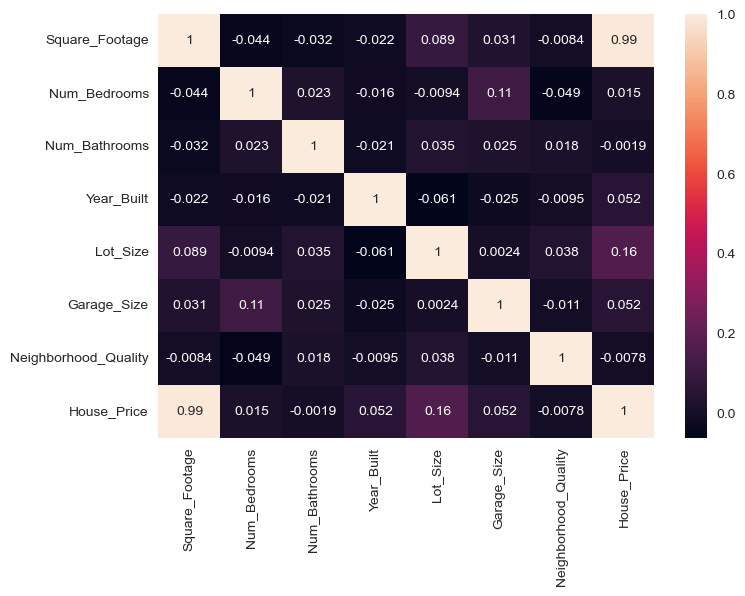

In [19]:
#plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [17]:
#correct to get price in hundred of thousands or millions
df['House_Price'] = df['House_Price'].apply(lambda x: float('{:.2f}'.format(x)))

0       262382.85
1       985260.85
2       777977.39
3       229698.92
4      1041740.86
          ...    
995     701494.00
996     683723.16
997     572024.02
998     964865.30
999     742599.25
Name: House_Price, Length: 1000, dtype: float64

In [20]:
df.tail()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,3261,4,1,1978,2.165110,2,10,701493.997069
996,3179,1,2,1999,2.977123,1,10,683723.160704
997,2606,4,2,1962,4.055067,0,2,572024.023634
998,4723,5,2,1950,1.930921,0,7,964865.298639
999,3268,4,2,1983,3.108790,2,2,742599.253332


In [22]:
df[df.duplicated()].shape

(0, 8)

In [24]:
#check out for duplicates to eliminate duplicates
df[df.duplicated()]

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price


## Explore Data

In [29]:
features = [feature for feature in df.columns if feature != 0]
features

['Square_Footage',
 'Num_Bedrooms',
 'Num_Bathrooms',
 'Year_Built',
 'Lot_Size',
 'Garage_Size',
 'Neighborhood_Quality',
 'House_Price']

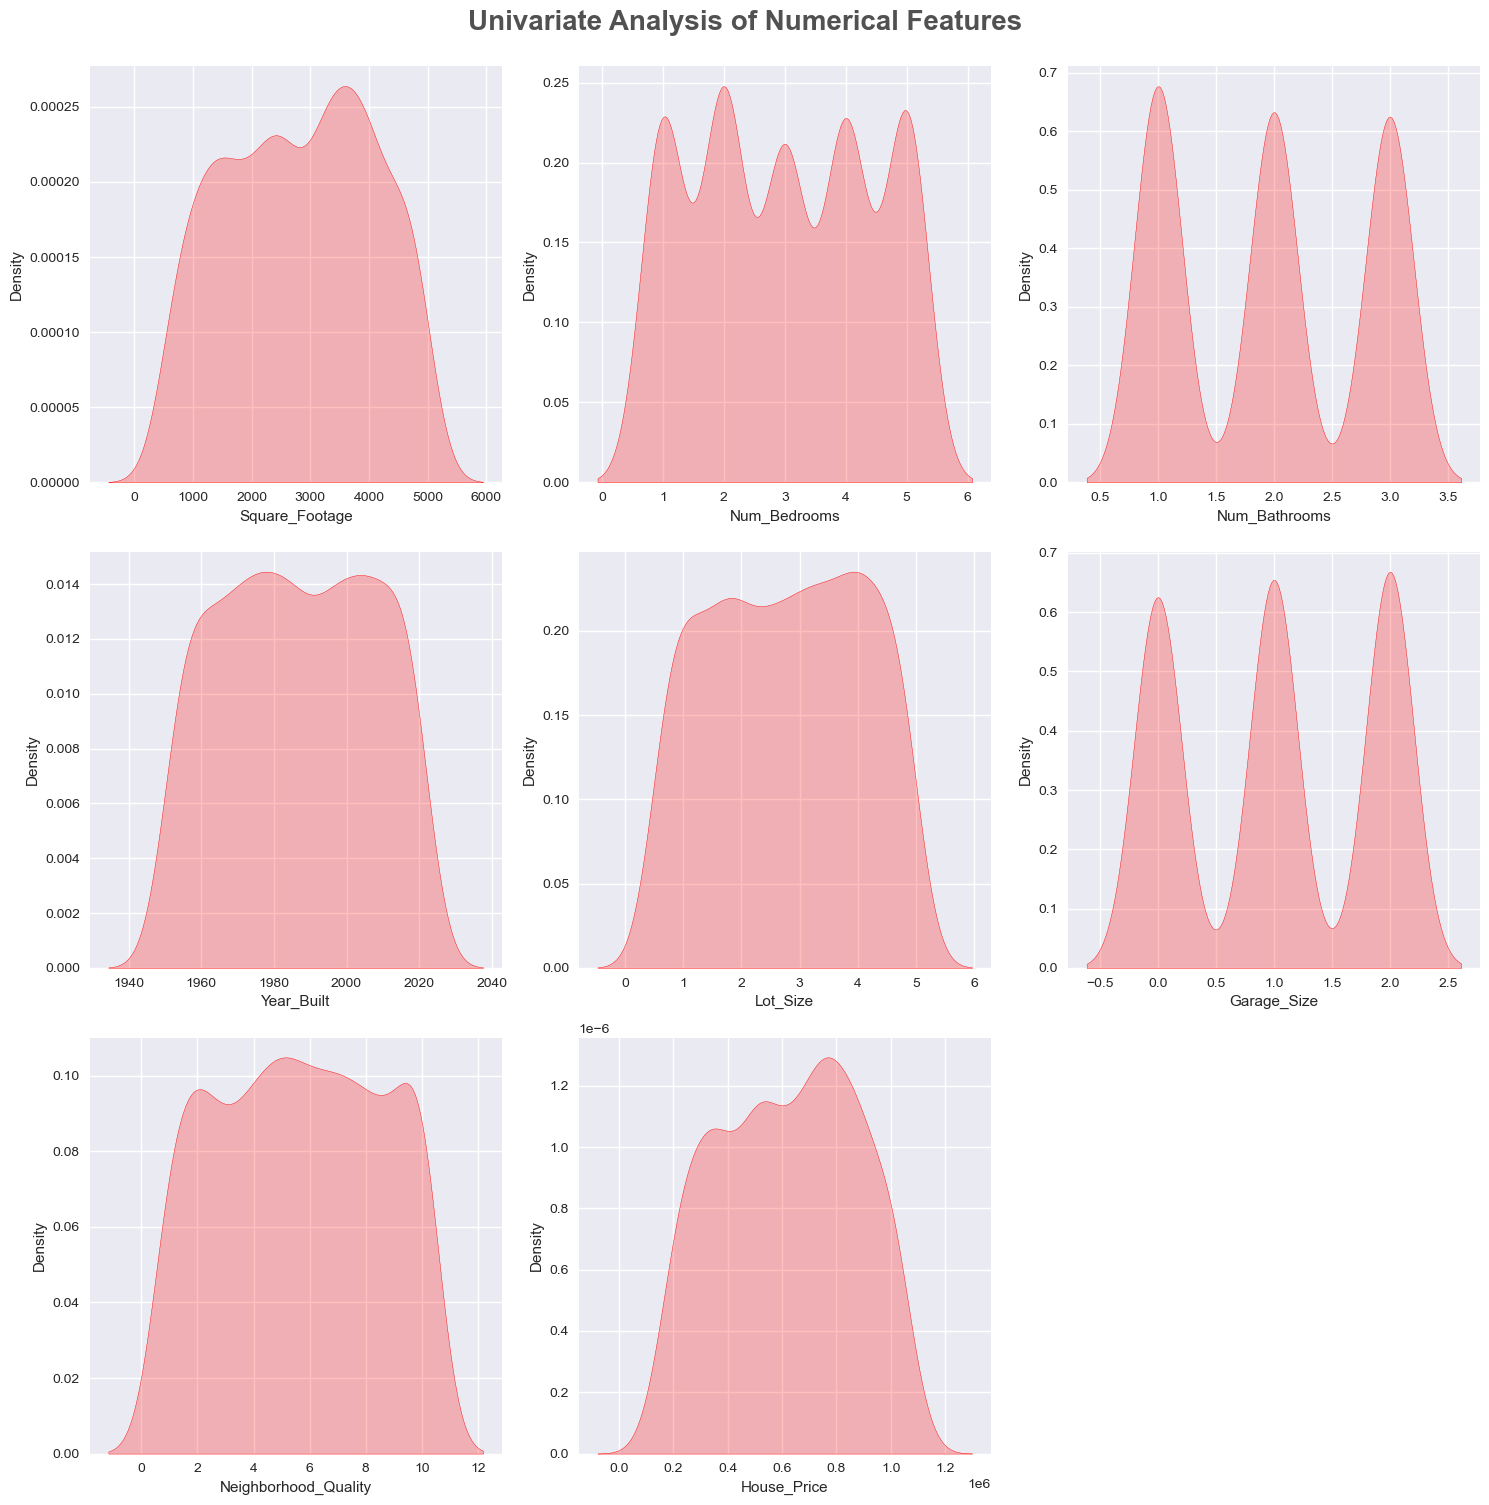

In [33]:


## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df[features[i]], shade=True, color='r')
    plt.xlabel(features[i])
    plt.tight_layout()

plt.show()  # <-- add this line

<Axes: xlabel='Num_Bedrooms', ylabel='count'>

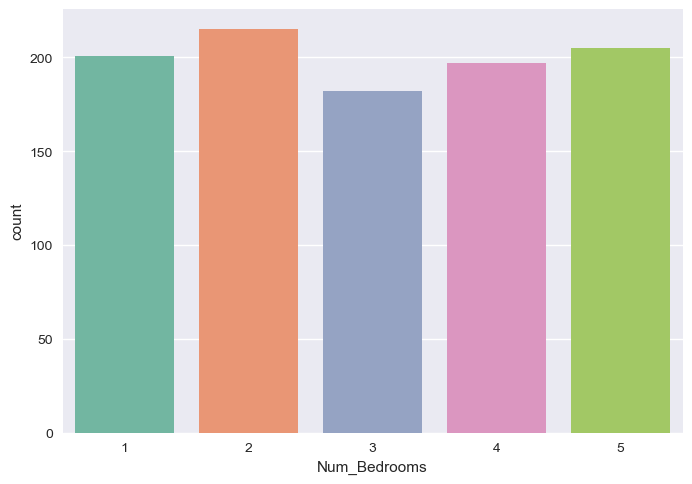

In [37]:
#the plot shows the division of num of bedrooms across dataset
sns.countplot(x = df['Num_Bedrooms'],palette="Set2")

<Axes: xlabel='Garage_Size', ylabel='count'>

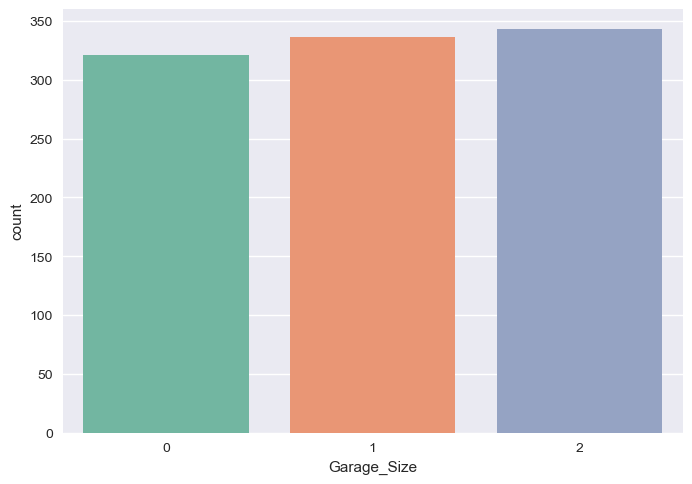

In [39]:
#the garage size description across dataset
sns.countplot(x = df['Garage_Size'],palette="Set2")

<Axes: xlabel='Neighborhood_Quality', ylabel='count'>

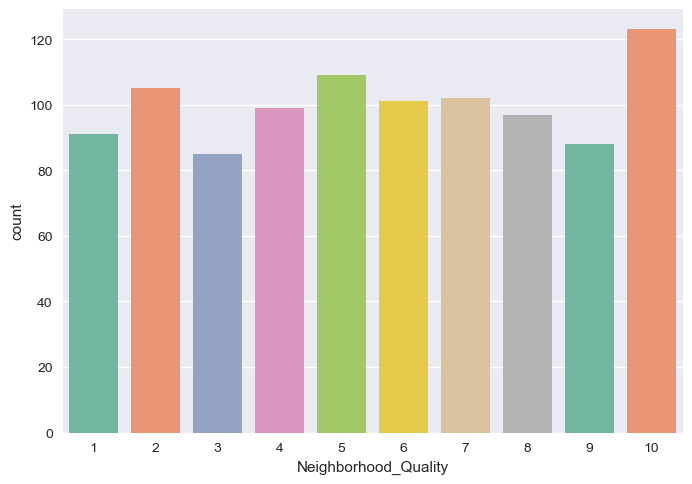

In [40]:
#the Neighborhood_Quality description across dataset
sns.countplot(x = df['Neighborhood_Quality'],palette="Set2")

<Axes: xlabel='House_Price', ylabel='Count'>

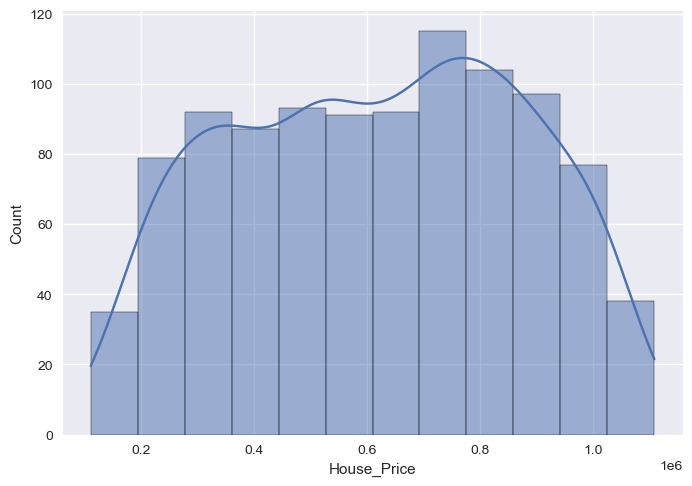

In [42]:
sns.histplot(df['House_Price'],kde = True)

In [73]:
df.iloc[:, :-1]


,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8
...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10
996,3179,1,2,1999,2.977123,1,10
997,2606,4,2,1962,4.055067,0,2
998,4723,5,2,1950,1.930921,0,7


<Axes: >

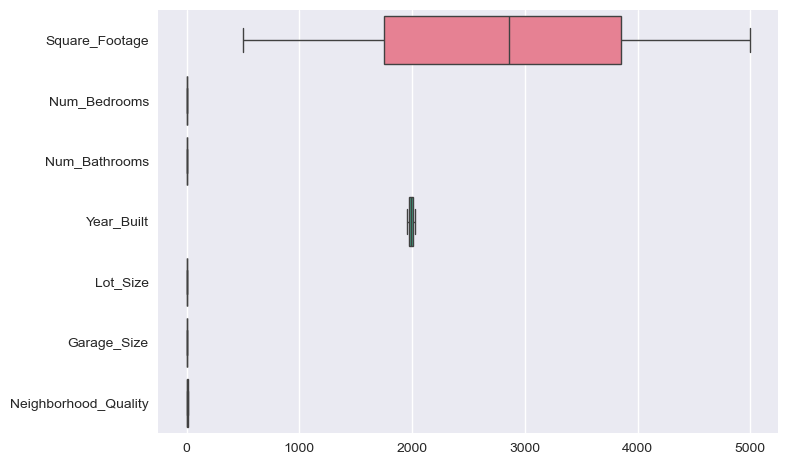

In [78]:
sns.boxplot(data = df.iloc[:, :-1], orient = 'h')

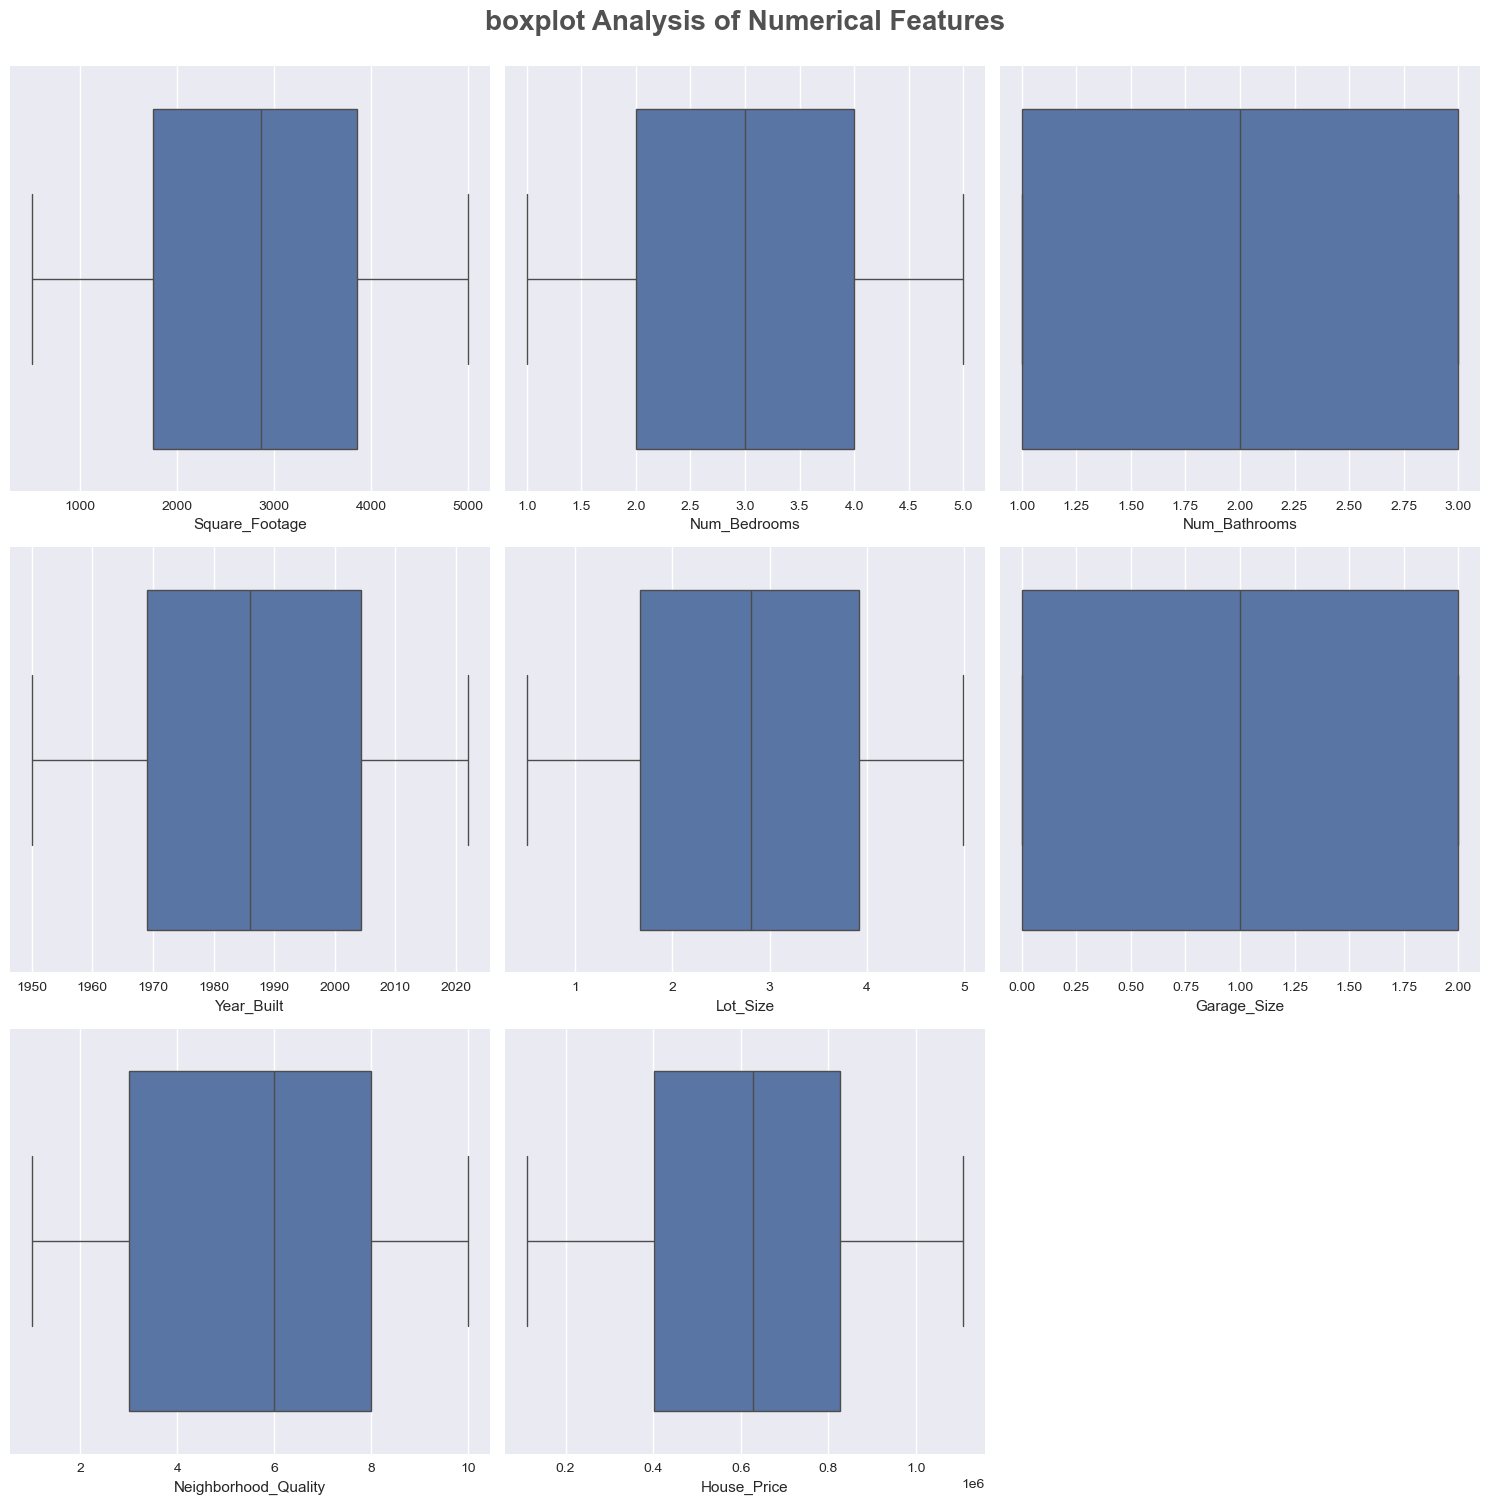

In [44]:
## Proportion of count data on numerical columns
plt.figure(figsize=(15, 15))
plt.suptitle('boxplot Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[features[i]],)
    plt.xlabel(features[i])
    plt.tight_layout()

## MODEL TRAINING

In [46]:
X = df.drop('House_Price', axis= 1)
y = df['House_Price']

In [47]:
###train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [48]:
X_train.shape, X_test.shape

((750, 7), (250, 7))

In [49]:
X_train.corr()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
Square_Footage,1.000000,-0.037139,-0.039674,-0.015196,0.122591,0.042105,-0.017682
Num_Bedrooms,-0.037139,1.000000,0.047958,-0.016086,-0.020114,0.125038,-0.038037
Num_Bathrooms,-0.039674,0.047958,1.000000,-0.010540,0.037491,0.035037,0.056073
Year_Built,-0.015196,-0.016086,-0.010540,1.000000,-0.030569,-0.039727,0.001888
Lot_Size,0.122591,-0.020114,0.037491,-0.030569,1.000000,0.007998,0.044594
Garage_Size,0.042105,0.125038,0.035037,-0.039727,0.007998,1.000000,0.010157
Neighborhood_Quality,-0.017682,-0.038037,0.056073,0.001888,0.044594,0.010157,1.000000


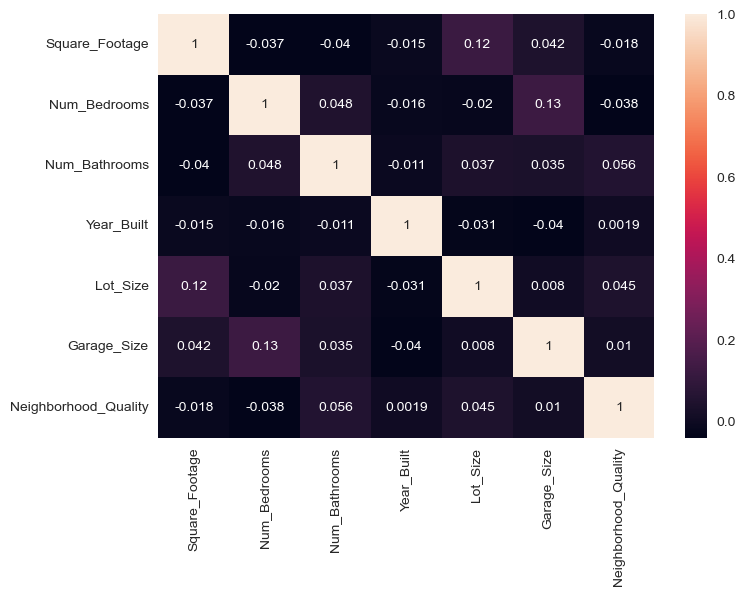

In [51]:
#check for multicollinearity
#plt.figure(figsize = (12,10))
corr = X_train.corr()
sns.heatmap(corr, annot = True)
plt.show()

In [52]:
#aim is to check for collinearity
def correlation(dataset, threshold):
    # Store columns with correlations above threshold and their paired columns
    high_corr_cols = set()
    high_corr_pairs = []
    
    # Calculate correlation matrix once
    corr_matrix = dataset.corr()
    
    # Find columns with high correlation and identify the pairs
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_i = corr_matrix.columns[i]
                col_j = corr_matrix.columns[j]
                corr_value = corr_matrix.iloc[i,j]
                
                # Add both columns to the set of high correlation columns
                high_corr_cols.add(col_i)
                high_corr_cols.add(col_j)
                
                # Store the pair and their correlation value
                high_corr_pairs.append((col_i, col_j, corr_value))
    
    # Calculate VIF for numeric columns if statsmodels is available
    try:
        from statsmodels.stats.outliers_influence import variance_inflation_factor
        numeric_data = dataset.select_dtypes(include=[np.number]).dropna()
        
        # Calculate VIF values
        vif_values = {}
        for i, column in enumerate(numeric_data.columns):
            vif_values[column] = variance_inflation_factor(numeric_data.values, i)
        
        # Return comprehensive results
        return {
            'high_corr_columns': high_corr_cols,
            'high_corr_pairs': high_corr_pairs,
            'vif_values': vif_values
        }
    
    except ImportError:
        # If statsmodels is not available, just return correlation results
        return {
            'high_corr_columns': high_corr_cols,
            'high_corr_pairs': high_corr_pairs
        }

In [54]:
##set threshold
correlation(X_train, 0.90)

{'high_corr_columns': set(),
 'high_corr_pairs': [],
 'vif_values': {'Square_Footage': 6.260400466716371,
  'Num_Bedrooms': 5.5305815964510785,
  'Num_Bathrooms': 6.882851882132515,
  'Year_Built': 23.863627332077268,
  'Lot_Size': 5.753517289851005,
  'Garage_Size': 2.602141826377433,
  'Neighborhood_Quality': 4.727673713862257}}

In [55]:
##FEATURE SCALING 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

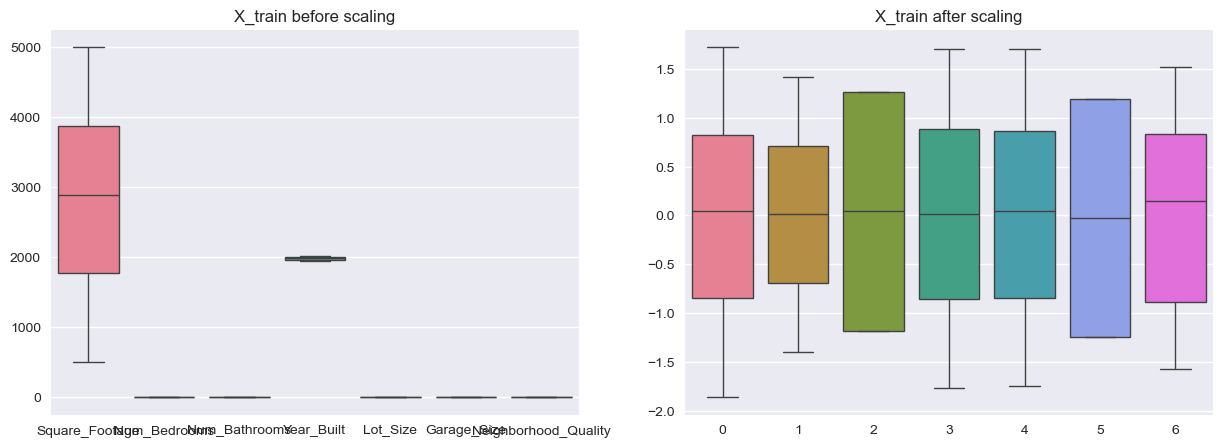

In [56]:
##check out for outliers and effect of standard scaling

## Check out for outliers and effect of standard scaling
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

plt.show()

In [79]:
##Linear regression  Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Model
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

# Prediction
y_pred = linreg.predict(X_test_scaled)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Output
print('MAE:', mae)
print("--" * 20)
print('RMSE:', rmse)
print("--" * 20)
print('R²:', r2)

MAE: 8170.829151010903
----------------------------------------
RMSE: 10196.583986149893
----------------------------------------
R²: 0.99836341348187


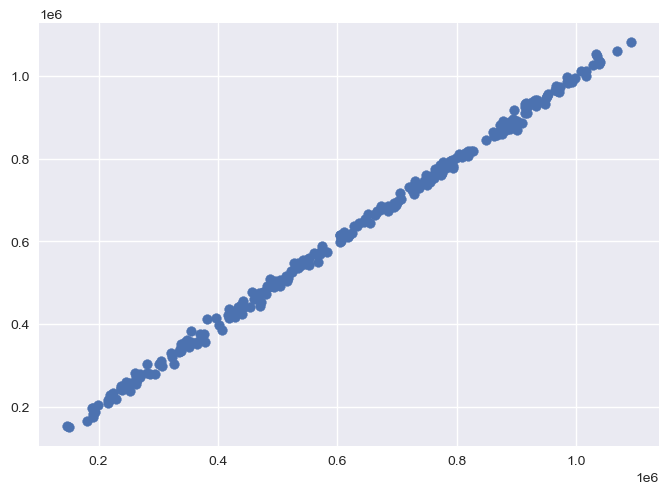

In [80]:
plt.scatter(y_test, y_pred)
plt.show()

In [82]:
residual = y_test - y_pred
residual

521    31942.104854
737     4104.369976
740     3731.920163
660     7243.484750
411    17230.400148
           ...     
109    12373.272722
430    -5043.406124
77     -8988.553329
84     -9874.992665
286     5804.027411
Name: House_Price, Length: 250, dtype: float64

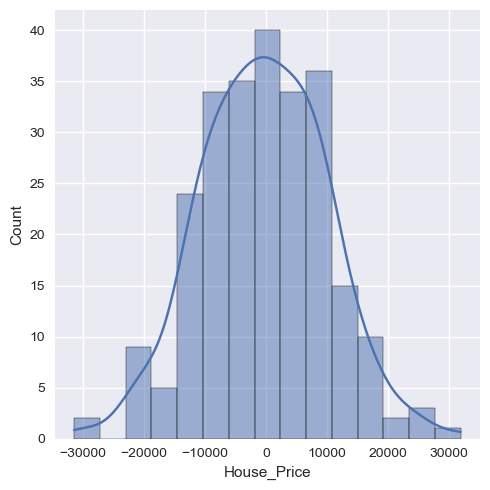

In [83]:
sns.displot(residual, kde = True)

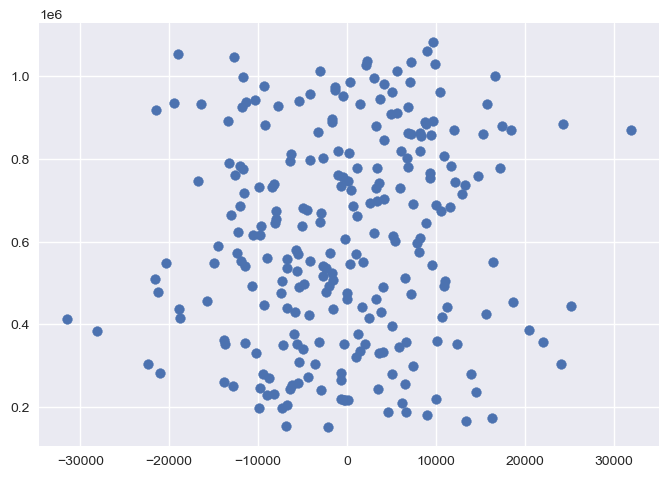

In [86]:
plt.scatter(residual, y_pred)

In [87]:
##save the transformer and model
linreg


LinearRegression()

In [88]:
scaler 

StandardScaler()

In [89]:
import joblib

# Save the model to a file
joblib.dump(linreg, 'linear_model.pkl')

joblib.dump(scaler, 'transformer_model.pkl')


['transformer_model.pkl']

In [96]:
linreg.coef_

array([250033.3897579 ,  14553.86834301,   6728.8867255 ,  20798.31985589,
        19139.38457334,   4173.27100251,    375.28528908])

In [94]:
%%writefile house_predictor.py

import streamlit as st
# This must be the first Streamlit command
st.set_page_config(page_title="House Price Predictor", page_icon="🏡")

import numpy as np
import joblib
import plotly.express as px
import pandas as pd

# Cache the model loading to improve performance
@st.cache_resource
def load_models():
    """Load and cache the prediction models"""
    scaler = joblib.load('transformer_model.pkl')
    linreg = joblib.load('linear_model.pkl')
    return scaler, linreg

# Load the models
scaler, linreg = load_models()

# App header
st.title("🏡 House Price Predictor")
st.write("Enter house details below to estimate the price")

# Create two columns for a more compact layout
col1, col2 = st.columns(2)

with col1:
    square_footage = st.number_input("Square Footage", min_value=500, max_value=5000, value=1500)
    num_bedrooms = st.number_input("Bedrooms", min_value=1, max_value=5, value=3)
    num_bathrooms = st.number_input("Bathrooms", min_value=1, max_value=3, value=2)
    year_built = st.number_input("Year Built", min_value=1950, max_value=2022, value=2000)

with col2:
    lot_size = st.number_input("Lot Size (acres)", min_value=0.1, max_value=5.0, value=0.5, step=0.1)
    garage_size = st.radio("Garage Size (cars)", options=[0, 1, 2], index=1)
    neighborhood_quality = st.slider("Neighborhood Quality", 1, 10, 5, 
                                   help="1 = Poor, 10 = Excellent")

# Predict button
if st.button("Predict House Price", use_container_width=True):
    # Show a spinner during prediction
    with st.spinner("Calculating price..."):
        # Arrange input data
        input_data = np.array([[square_footage, num_bedrooms, num_bathrooms, year_built,
                               lot_size, garage_size, neighborhood_quality]])
        
        # Transform the input
        input_scaled = scaler.transform(input_data)
        
        # Predict
        predicted_price = linreg.predict(input_scaled)[0]
    
    # Display the result with nice formatting
    st.success(f"Estimated House Price: ${predicted_price:,.2f}")
    
    # Create a simple feature importance chart (for demonstration)
    features = ['Square Footage', 'Bedrooms', 'Bathrooms', 'Year Built', 
               'Lot Size', 'Garage Size', 'Neighborhood']
    importance = [0.35, 0.15, 0.18, 0.12, 0.08, 0.05, 0.07]  # Example values
    
    fig = px.bar(
        x=importance, 
        y=features, 
        orientation='h',
        title="Feature Importance",
        labels={'x': 'Importance', 'y': 'Feature'},
        color=importance,
        color_continuous_scale='blues'
    )
    
     # st.plotly_chart(fig, use_container_width=True)
    
    # Display example comparable houses
    st.subheader("Similar Properties")
    data = {
        'Square Footage': [square_footage-100, square_footage+200, square_footage-50],
        'Bedrooms': [num_bedrooms, num_bedrooms+1, num_bedrooms],
        'Bathrooms': [num_bathrooms-0.5, num_bathrooms, num_bathrooms+0.5],
        'Year Built': [year_built-5, year_built+10, year_built-15],
        'Price': [predicted_price*0.92, predicted_price*1.15, predicted_price*0.88]
    }
    df = pd.DataFrame(data)
    df['Price'] = df['Price'].map('${:,.2f}'.format)
    st.dataframe(df, use_container_width=True)

# Footer
st.markdown("---")
st.caption("Made with Streamlit • Model last updated: May 2025")


Overwriting house_predictor.py


In [95]:
!streamlit run house_predictor.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.178.59:8501

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
^C
  Stopping...


## deploy model in AWS


In [97]:
%%writefile requirements.txt

streamlit
numpy
pandas
joblib
plotly

Writing requirements.txt


In [102]:
%%writefile python.config
option_settings:
  aws:elasticbeanstalk:application:environment:
    PORT: 8080


Writing python.config


In [103]:
%%writefile application.py

import subprocess
import os

def application(environ, start_response):
    start_response('200 OK', [('Content-type', 'text/html')])
    
    # Start Streamlit process
    port = environ.get('PORT', '8080')
    process = subprocess.Popen(['streamlit', 'run', 'house_predictor.py', '--server.port', port])
    
    return [b"Streamlit app is running. Please navigate to the correct URL."]

Writing application.py
